In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("data/clean/cleaned_aac_data.csv", index_col=0)

In [37]:
df.head()

,datetime,intake_type,intake_condition,animal_type,sex_upon_intake,date,sex_status
0,2019-01-03t16:19:00.000,stray,normal,dog,male,2019-01-03,neutered
1,2015-07-05t12:59:00.000,stray,normal,dog,female,2015-07-05,spayed
2,2016-04-14t18:43:00.000,stray,normal,dog,male,2016-04-14,intact
3,2013-10-21t07:59:00.000,stray,sick,cat,female,2013-10-21,intact
4,2022-05-12t00:23:00.000,public assist,normal,cat,male,2022-05-12,neutered


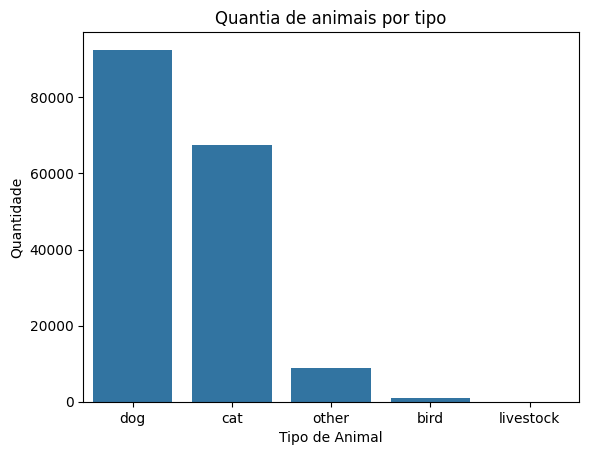

In [38]:
animal_type_counts = df["animal_type"].value_counts()
sns.barplot(x=animal_type_counts.index, y=animal_type_counts.values)

# Add labels
plt.title("Quantia de animais por tipo")
plt.xlabel("Tipo de Animal")
plt.ylabel("Quantidade")

# Show the plot
plt.show()

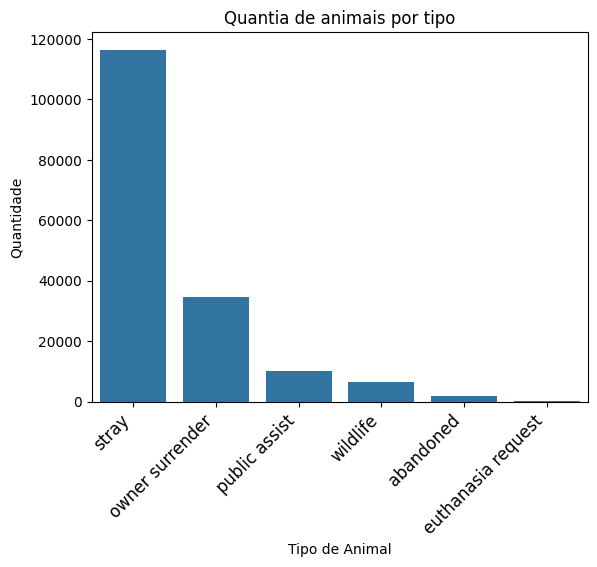

In [39]:
intake_type_counts = df["intake_type"].value_counts()
sns.barplot(x=intake_type_counts.index, y=intake_type_counts.values)

# Add labels
plt.title("Quantia de animais por tipo")
plt.xlabel("Tipo de Animal")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right", fontsize=12)

# Show the plot
plt.show()

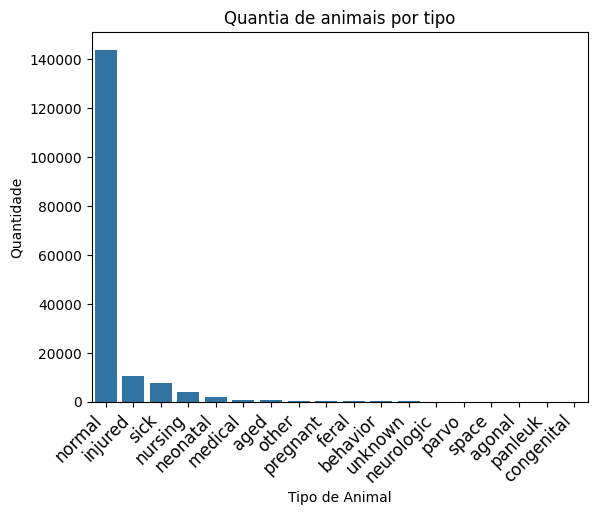

In [40]:
intake_condition_counts = df["intake_condition"].value_counts()
sns.barplot(x=intake_condition_counts.index, y=intake_condition_counts.values)

# Add labels
plt.title("Quantia de animais por tipo")
plt.xlabel("Tipo de Animal")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right", fontsize=12)

# Show the plot
plt.show()

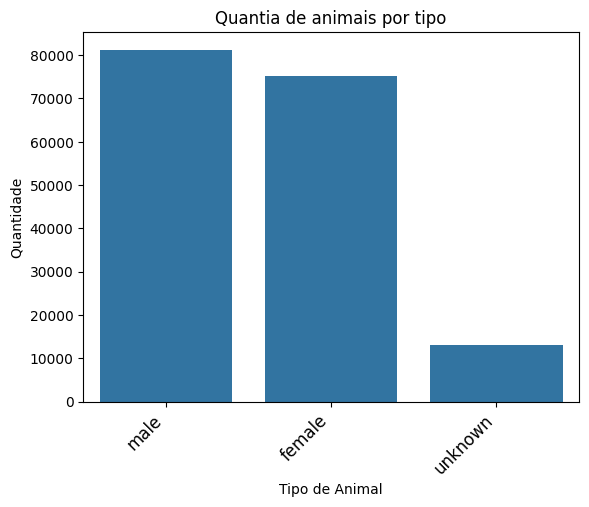

In [41]:
sex_upon_intake_counts = df["sex_upon_intake"].value_counts()
sns.barplot(x=sex_upon_intake_counts.index, y=sex_upon_intake_counts.values)

# Add labels
plt.title("Quantia de animais por tipo")
plt.xlabel("Tipo de Animal")
plt.ylabel("Quantidade")
plt.xticks(rotation=45, ha="right", fontsize=12)

# Show the plot
plt.show()

In [ ]:
df2 = (
    df.groupby(["date", "animal_type"])
    .agg(count=("animal_type", "count"))
    .reset_index()
)
df2.head()

,date,animal_type,count
0,2013-10-01,cat,36
1,2013-10-01,dog,42
2,2013-10-02,cat,21
3,2013-10-02,dog,28
4,2013-10-02,other,3


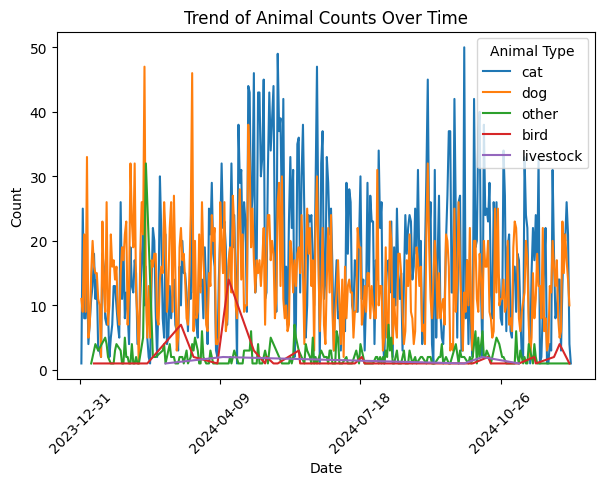

In [55]:
import matplotlib.dates as mdates

df2["date"] = pd.to_datetime(df2["date"])
df2 = df2[df2["date"].dt.year.isin([2024])]
df2_filtered = df2.sort_values(by=["date"])


sns.lineplot(data=df2, x="date", y="count", hue="animal_type")
plt.title("Trend of Animal Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Animal Type")
plt.tight_layout()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.show()